In [464]:
#Loading an example dataset
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

#learning
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(digits.data[:-1], digits.target[:-1])

#predicting

clf.predict(digits.data[-1:])

In [465]:
#In a different example Model persistance

from sklearn import svm
from sklearn import datasets
#define our classifier
clf = svm.SVC()

#load a sample dataset in this case the iris data set
iris = datasets.load_iris()

#X will be the data and y will be the ground truth to which we are comparing
X, y = iris.data, iris.target

#now the classifier will learn how to relate X and y
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [466]:
#we use pickle to turn the data into something that Python can read
#to do that we need to import pickle, dump the classifier, and then load it

import pickle
s = pickle.dumps(clf)


#load the clf data to a new classifier
clf2 = pickle.loads(s)


#test the classifier
print clf2.predict(X)

print clf
#to check if they are the same

np.all(clf.predict(X)==clf2.predict(X))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


True

In [467]:
#In the specific case of the scikit, it may be more interesting to use 
#joblib’s replacement of pickle (joblib.dump & joblib.load), which is
#more efficient on big data, but can only pickle 
#to the disk and not to a string:
from sklearn.externals import joblib
joblib.dump(clf, 'testofjoblib.pkl') 

['testofjoblib.pkl']

In [468]:
#now we want to load the data to creat your classifier
clf2 = joblib.load('testofjoblib.pkl') 

#train and test the clf
clf.fit(iris.data,iris.target)
clf.predict(X)

In [469]:
clf2.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [470]:
from sklearn.cross_validation import train_test_split,cross_val_predict,cross_val_score
from sklearn import metrics

In [471]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
Xtrain.shape


(112, 4)

In [472]:
ytrain.shape

(112,)

In [473]:
clf2.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [474]:
pred=clf2.predict(Xtrain)

In [475]:
print metrics.accuracy_score(ytrain,pred)

0.991071428571


In [476]:
print metrics.confusion_matrix(ytrain,pred)

[[35  0  0]
 [ 0 38  1]
 [ 0  0 38]]


In [477]:
pred =clf2.predict(Xtest)

In [478]:
print metrics.accuracy_score(ytest,pred)
print metrics.confusion_matrix(ytest,pred)

1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# I want to check if I can load  the occupancy maps with SKlearn

In [34]:
import tensorflow as tf
#import utils as utils
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np
import sklearn

In [35]:
data_folder = '../ML4DQM/data'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r+')

data_sample= np.array(input_file[group])
datasampleshape=data_sample.shape
print datasampleshape

(999, 72, 84)


Make a column in every image a 1 or True ( this will represent it's label)

In [130]:
def killregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=np.min(xdim)
    x2=np.max(xdim)
    y1=np.min(ydim)
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
    #if tempX.ndim ==3:
    #    
    #    for k in range(tempX.shape[0]):
    #        
    #        for i in range(x1,x2):
    #            
    #            for j in range(y1,y2):
    #                
    #                tempX[k,j,i]=0
    #
    #else:
        
    for i in range(x1,x2):
            
        for j in range(y1,y2):
                
            tempX[j,i]=0
                
    return tempX


#help (np.zeros)
def hotregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=np.min(xdim)
    x2=np.max(xdim)
    y1=np.min(ydim)
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
   # if tempX.ndim ==3:
   #     
   #     for k in range(tempX.shape[0]):
   #         
   #         for i in range(x1,x2):
   #             
   #             for j in range(y1,y2):
   #                 
   #                 tempX[k,j,i]=np.max(image)
   # else:
        
    for i in range(x1,x2):
            
        for j in range(y1,y2):
                
            tempX[j,i]=np.max(image)
                
    return tempX

def randomregion(image,xdim,ydim):
    
    
    tempX=image.copy()
    x1=np.min(xdim)
    x2=np.max(xdim)
    y1=np.min(ydim)
    y2=np.max(ydim)
    if x1==x2 | y1==y2:
        print "error, no change is made on image"
    #print "x1,x2,y1,y2",x1,x2,y1,y2
    random_noise_region=np.random.randint(np.max(image), size=( abs(x2-x1), abs(y2-y1) ) )   
    #print "random_noise_region.shape",random_noise_region.shape
    

  #  if tempX.ndim == 3:
  #      
  #      for k in range(tempX.shape[0]):
  #          
  #          for i in range(x1,x2):
  #              
  #              for j in range(y1,y2):
  #                  te = i-x1
  #                  te2= j-y1
  #                  tempX[k,j,i]=random_noise_region[te,te2]
  #  
  #  else:
  #      
    for i in range(x1,x2):
            
        for j in range(y1,y2):
            te = i-x1
            te2= j-y1
            tempX[j,i]=random_noise_region[te,te2]
                
    return tempX

xdim,ydim: (3, 8) (61, 66)
0
xdim,ydim: (19, 24) (47, 52)
1
xdim,ydim: (17, 22) (34, 39)
2
xdim,ydim: (4, 9) (41, 46)
3
xdim,ydim: (66, 71) (20, 25)
4
xdim,ydim: (2, 7) (58, 63)
5
xdim,ydim: (33, 38) (28, 33)
6
xdim,ydim: (32, 37) (4, 9)
7
xdim,ydim: (13, 18) (3, 8)
8
xdim,ydim: (40, 45) (54, 59)
9
xdim,ydim: (22, 27) (32, 37)
10
xdim,ydim: (34, 39) (9, 14)
11
xdim,ydim: (68, 73) (1, 6)
12
xdim,ydim: (29, 34) (4, 9)
13
xdim,ydim: (31, 36) (8, 13)
14
xdim,ydim: (13, 18) (9, 14)
15
xdim,ydim: (44, 49) (40, 45)
16
xdim,ydim: (63, 68) (11, 16)
17
xdim,ydim: (23, 28) (30, 35)
18
xdim,ydim: (8, 13) (30, 35)
19
xdim,ydim: (49, 54) (14, 19)
20
xdim,ydim: (10, 15) (60, 65)
21
xdim,ydim: (4, 9) (29, 34)
22
xdim,ydim: (49, 54) (49, 54)
23
xdim,ydim: (53, 58) (56, 61)
24
xdim,ydim: (32, 37) (63, 68)
25
xdim,ydim: (20, 25) (2, 7)
26
xdim,ydim: (19, 24) (9, 14)
27
xdim,ydim: (42, 47) (19, 24)
28
xdim,ydim: (11, 16) (37, 42)
29
xdim,ydim: (36, 41) (62, 67)
30
xdim,ydim: (12, 17) (65, 70)
31
xdim,ydim

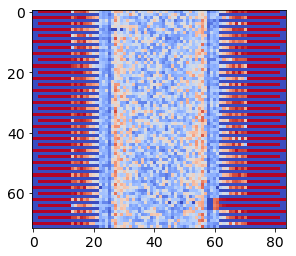

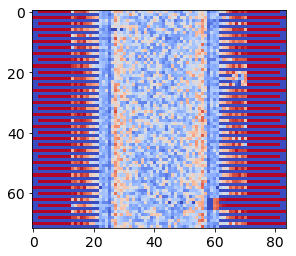

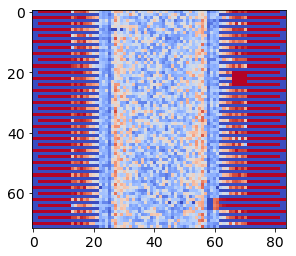

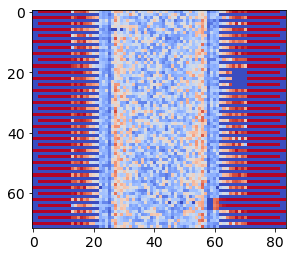

In [389]:
input_images=data_sample[:100]
hotregion_image=[]
deadregion_image=[]
random_image=[]
count=0
for k in input_images:
    a=np.random.randint(datasampleshape[2]-14)
    b=np.random.randint(datasampleshape[1]-5)
    xdim=(a,a+5)
    ydim=(b,b+5)
    hotregion_image.append( hotregion(k,xdim,ydim))
    deadregion_image.append(killregion(k,xdim,ydim))
    random_image.append(randomregion(k,xdim,ydim))
    print "xdim,ydim:",xdim,ydim
    print count
    count+=1
    
    
hotregion_image=np.array(hotregion_image)
deadregion_image=np.array(deadregion_image)
random_image=np.array(random_image)
#print "xdim,ydim",xdim,ydim
print "Shape of regular image is: ",input_images.shape
print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape
print "Shape of random image is: " ,random_image.shape

print '\nmax of image is: ' ,np.max(input_images)

im=plt.imshow(input_images[4],cmap=cm.coolwarm)
plt.show()
plt.clf()


im=plt.imshow(random_image[4],cmap=cm.coolwarm)
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[4],cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[4],cmap=cm.coolwarm)
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


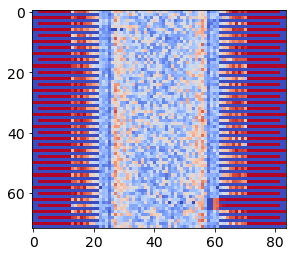

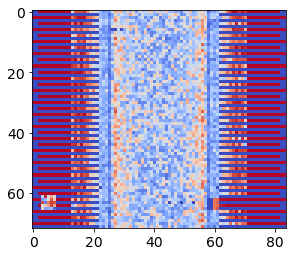

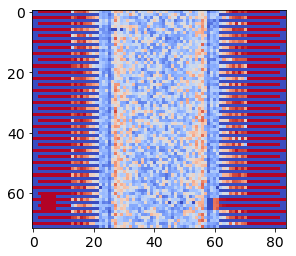

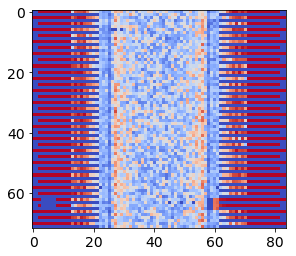

In [390]:
im=plt.imshow(input_images[0],cmap=cm.coolwarm)
plt.show()
plt.clf()


im=plt.imshow(random_image[0],cmap=cm.coolwarm)
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[0],cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[0],cmap=cm.coolwarm)
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))

# Adding the bad data to the dataset

In [391]:
sample= np.append(data_sample,hotregion_image,axis=0)
sample= np.append(sample,deadregion_image,axis=0)
sample= np.append(sample,random_image,axis=0)            


In [392]:
print sample.shape

(1299, 72, 84)


In [393]:
sample=np.reshape(sample,(sample.shape[0],
                          sample.shape[1]*sample.shape[2] ) )
sample.shape

(1299, 6048)

Add the labels at the last column

In [394]:
sample=np.append(sample,np.ones((sample.shape[0],1)),axis=1 )
sample.shape

(1299, 6049)

In [395]:
sample[-3*input_images.shape[0]:,-1:]=0

# Now to create and train a model

Define our X's and y's

In [396]:
X=sample[:,:-1]
y=sample[:,-1]
print "X shape is: ",X.shape
print "y shape is: ",y.shape

X shape is:  (1299, 6048)
y shape is:  (1299,)


In [454]:
#from sklearn.neural_network import MLPClassifier #this one takes too long
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split,cross_val_score
Xtrain,Xtest,ytrain, ytest=train_test_split(X,y,test_size=.35,random_state =5 )

print Xtrain.shape
print Xtest.shape
print ytrain.shape
print ytest.shape

(844, 6048)
(455, 6048)
(844,)
(455,)


In [455]:
logreg=LogisticRegression( random_state=50)

In [456]:
scores= cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()
print scores

0.828449612403


In [457]:
logreg.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [458]:
pred=logreg.predict(Xtest)
print pred.shape
print metrics.accuracy_score(ytest,pred)

(455,)
0.865934065934


In [459]:
#calcualte null accuracy
max(ytest.mean(),1-ytest.mean())

0.74725274725274726

In [460]:
#Confusion matrix
print metrics.confusion_matrix(ytest,pred)

[[ 54  61]
 [  0 340]]


In [461]:
#save confusion matrix and slice into 4 pieces
confusion= metrics.confusion_matrix(ytest,pred)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [462]:
print "True Pos:",TP
print "True Neg:",TN
print "False Pos:",FP
print "False Neg:",FN

True Pos: 340
True Neg: 54
False Pos: 61
False Neg: 0


In [453]:
#Clasification Accuracy
#how often is the Clf correct?
print 'Clasification Accuracy'
print (TP+TN)/ float(TP+TN+FP+FN)
print metrics.accuracy_score(ytest,pred)


#Clasification Error
# how often is it incorrect?
print 'Clasification Error'
print (FP+FN)/ float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(ytest,pred)


#Sensitivity
# How often if the prediction correct when the actual value is pos. 
#AKA True pos or Recall
print 'Sensitivity or Recall'
print TP/ float(TP+FN)
print metrics.recall_score(ytest,pred)


#Specificity 
# When the actual result is neg how often is it correct?
print 'Specificity'
print TN/ float(TN+FP)

#false positive rate
# When the actual value is negative how often is it incorrect
print 'False Positive Rate'
print FP/ float(TN+FP)


#Precision
#When a positive value is predicted, how often is it correct?
print 'Precision'
print TP/ float(TP +FP)
print metrics.precision_score(ytest,pred)

Clasification Accuracy
0.883076923077
0.883076923077
Clasification Error
0.116923076923
0.116923076923
Sensitivity or Recall
0.995762711864
0.995762711864
Specificity
0.584269662921
False Positive Rate
0.415730337079
Precision
0.863970588235
0.863970588235


# Adjusting the clasification threshold

In [429]:
#print the first 10 predicted responses
logreg.predict(Xtest)[0:10]

array([ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

In [430]:
#print the first 10 predicted probabilities of class membership
logreg.predict_proba(Xtest)[0:10,:]

array([[  7.37556904e-09,   9.99999993e-01],
       [  5.16001444e-08,   9.99999948e-01],
       [  3.17517711e-07,   9.99999682e-01],
       [  9.99987441e-01,   1.25592177e-05],
       [  1.85120646e-02,   9.81487935e-01],
       [  9.92745441e-10,   9.99999999e-01],
       [  4.13871998e-06,   9.99995861e-01],
       [  1.65983978e-07,   9.99999834e-01],
       [  6.54447475e-03,   9.93455525e-01],
       [  1.71621128e-06,   9.99998284e-01]])

In [431]:
#print the first 10 predicted probabilities for class 1
logreg.predict_proba(Xtest)[0:10,1]

array([  9.99999993e-01,   9.99999948e-01,   9.99999682e-01,
         1.25592177e-05,   9.81487935e-01,   9.99999999e-01,
         9.99995861e-01,   9.99999834e-01,   9.93455525e-01,
         9.99998284e-01])

In [432]:
#store the predicted probabilities for class 1
y_pred_prob=logreg.predict_proba(Xtest)[:,1]

Text(0,0.5,u'Frequency')

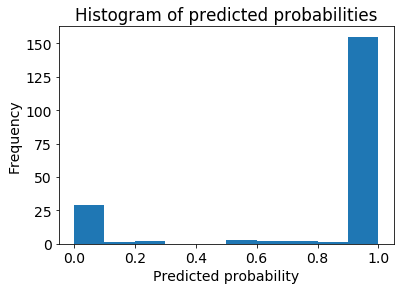

In [433]:
#allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['font.size']=14

#histogram of predicted probabilities
plt.hist(y_pred_prob)#bins=8)
#plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

# Change the threshold 

In [434]:
#predict good if the predicted probability is greater than x
from sklearn.preprocessing import binarize
pred= binarize(y_pred_prob,.99877551)[0]

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [435]:
#print the first 10 predicted probabilities
y_pred_prob[0:10]

array([  9.99999993e-01,   9.99999948e-01,   9.99999682e-01,
         1.25592177e-05,   9.81487935e-01,   9.99999999e-01,
         9.99995861e-01,   9.99999834e-01,   9.93455525e-01,
         9.99998284e-01])

In [436]:
#print the first 10 predicted classes with new thershold
pred[0:10]

array([ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.])

In [437]:
#print old confusion matrix
print confusion

[[ 32  20]
 [  0 143]]


In [438]:
#print new confusion matrix
print metrics.confusion_matrix(ytest,pred)

[[ 45   7]
 [ 13 130]]


# ROC Curves and Area Under the Curve (AUC)

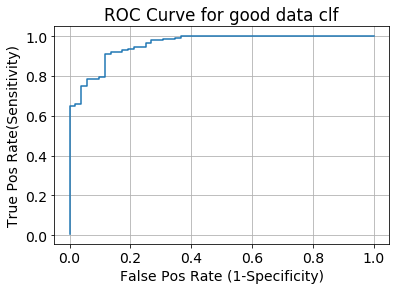

In [439]:
fpr,tpr,thresholds= metrics.roc_curve(ytest,y_pred_prob)
plt.plot(fpr,tpr)
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
plt.title('ROC Curve for good data clf')
plt.xlabel('False Pos Rate (1-Specificity)')
plt.ylabel('True Pos Rate(Sensitivity)')
plt.grid(True)

In [440]:
#define a function that accepts a threshold and prints sensitivity and specificity
def evalualte_threshold(threshold):
    print 'Sensitivity:',tpr[thresholds > threshold][-1]
    print 'Specificity:',1- fpr[thresholds > threshold][-1]
    print '------------'

In [441]:
from pylab import linspace
x=linspace(0.99,1)
print x
count=0
for k in x:
    print count
    evalualte_threshold(k)
    count+=1

[ 0.99        0.99020408  0.99040816  0.99061224  0.99081633  0.99102041
  0.99122449  0.99142857  0.99163265  0.99183673  0.99204082  0.9922449
  0.99244898  0.99265306  0.99285714  0.99306122  0.99326531  0.99346939
  0.99367347  0.99387755  0.99408163  0.99428571  0.9944898   0.99469388
  0.99489796  0.99510204  0.99530612  0.9955102   0.99571429  0.99591837
  0.99612245  0.99632653  0.99653061  0.99673469  0.99693878  0.99714286
  0.99734694  0.99755102  0.9977551   0.99795918  0.99816327  0.99836735
  0.99857143  0.99877551  0.99897959  0.99918367  0.99938776  0.99959184
  0.99979592  1.        ]
0
Sensitivity: 0.93006993007
Specificity: 0.826923076923
------------
1
Sensitivity: 0.93006993007
Specificity: 0.826923076923
------------
2
Sensitivity: 0.93006993007
Specificity: 0.826923076923
------------
3
Sensitivity: 0.93006993007
Specificity: 0.826923076923
------------
4
Sensitivity: 0.93006993007
Specificity: 0.826923076923
------------
5
Sensitivity: 0.93006993007
Specificity:

IndexError: index -1 is out of bounds for axis 0 with size 0

# AUC is the percentage of the ROC plot that is under the curve

In [442]:
print metrics.roc_auc_score(ytest,y_pred_prob)

 0.958041958042


This is useful as a single number summary of classifier performance

In [443]:
# Calculate cross validated AUC

cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.92046666666666666